In [89]:
import numpy as np
import functions as func
import matplotlib.pyplot as plt
import pdb, glob, mpld3
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from mpld3 import plugins

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
mpld3.enable_notebook()

## BD +60 1753

In [110]:
fnames = np.sort(glob.glob('/data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/*_bcd.fits'))
len(fnames)

20

In [82]:
hdu    = fits.open(fnames[2])
header = hdu[0].header
image  = hdu[0].data
hdu.info()
hdu.close()

Filename: /data1/phot_cal/spitzer/bd601753/r11854336/ch1/bcd/SPITZER_I1_11854336_0001_0000_6_bcd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     295   (256, 256)   float32   


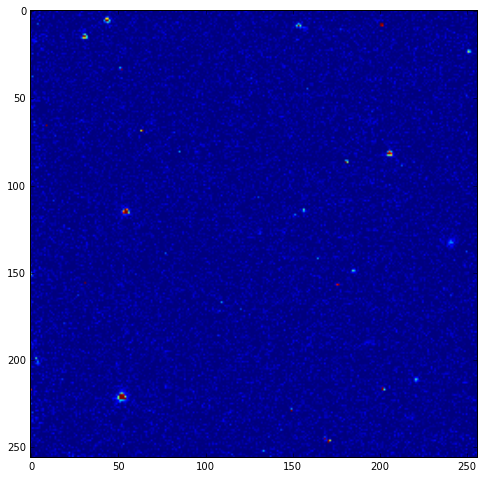

In [83]:
plt.imshow(image, vmin = 0, vmax = 10)

In [67]:
c = SkyCoord('17 24 52.2772360943 +60 25 50.780790994', unit=(u.hourangle, u.deg))
d = c.to_pixel(WCS(header))
c, d

(<SkyCoord (ICRS): (ra, dec) in deg
     ( 261.21782182,  60.43077244)>,
 (array(467.8066000384907), array(118.26041046501975)))

In [77]:
fnames[4][71:75]

'0002'

In [119]:
sky = SkyCoord('17 24 52.2772360943 +60 25 50.780790994', unit=(u.hourangle, u.deg))

for fname in fnames[1::2]:
    hdu    = fits.open(fname)
    header = hdu[0].header
    image = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    pix = sky.to_pixel(w)
    
    plot = plt.imshow(image, origin = 'lower', vmin = 0, vmax = 4)
    
    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
        flux, ap = func.photometry(image, [pix[0]], [pix[1]], rad = 3)
        ap.plot(color='y',linewidth=1)
    
        outfile = '../CalStar_ap_test/bd601753/folder3/bd_fol3_' + fname[71:75] + '.pdf'
        plt.title(fname[76:80])
        plt.colorbar(plot)
        plt.savefig(outfile)
        plt.clf()
    else:
        plt.clf()

plt.close()

NoConvergence: 'WCS.all_world2pix' failed to converge to the requested accuracy.
After 2 iterations, the solution is diverging at least for one input point.

In [91]:
data = Table(names = ('File#', 'ExpTime', 'Time[MJD]', 'Flux'), dtype= ('S5', 'f8', 'f8', 'f8'))
for fn in fnames:
    hdu    = fits.open(fn)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    pix = sky.to_pixel(w)
    
    ExpT = header['EXPTIME']
    fnum = fn[71:75]
    time = header['MJD_OBS']

    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
        flux = func.photometry(image, [pix[0]], [pix[1]], rad = 5)[0]
    data.add_row([fnum, ExpT, time, flux])
data

<Table length=20>
File# ExpTime   Time[MJD]        Flux    
 str5 float64    float64       float64   
----- ------- ------------- -------------
 0000     1.2  53228.934238  1094.7909403
 0000     1.2  53228.934261 1060.98380422
 0001     1.2 53228.9345991 1060.98380422
 0001     1.2 53228.9346221 1060.98380422
 0002     1.2 53228.9349648 1037.02857976
 0002     1.2 53228.9349879  1024.0226118
 0003     1.2 53228.9353028  1024.0226118
 0003     1.2 53228.9353258  1024.0226118
 0004     1.2 53228.9356314 1071.68121293
 0004     1.2 53228.9356546 1045.13518637
 0005     1.2 53228.9359694 1045.13518637
 0005     1.2 53228.9359925 1045.13518637
 0006     1.2 53228.9363306 1070.60253315
 0006     1.2 53228.9363536 1044.63352649
 0007     1.2  53228.936673 1044.63352649
 0007     1.2 53228.9366962 1044.63352649
 0008     1.2 53228.9370434 1095.05411032
 0008     1.2 53228.9370665 1067.09733791
 0009     1.2 53228.9373814 1067.09733791
 0009     1.2 53228.9374045 1067.09733791

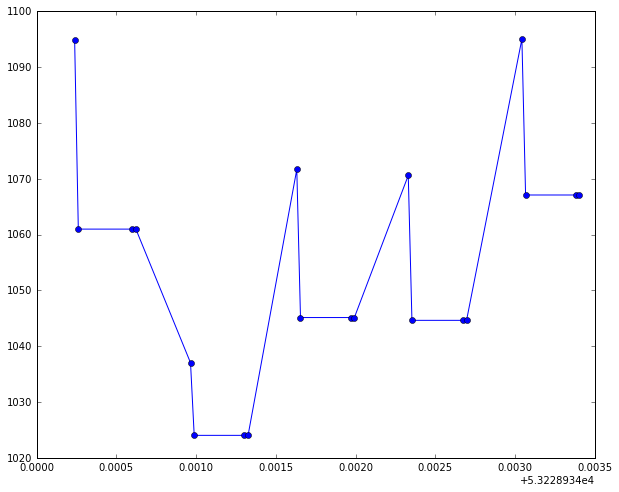

In [95]:
plt.plot(data['Time[MJD]'], data['Flux'], 'o-')

## hd165459

In [112]:
fnames = np.sort(glob.glob('/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/*_bcd.fits'))
len(fnames)

10

In [113]:
hdu    = fits.open(fnames[2])
header = hdu[0].header
image  = hdu[0].data
hdu.info()
hdu.close()

Filename: /data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0002_0000_6_bcd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     295   (256, 256)   float32   


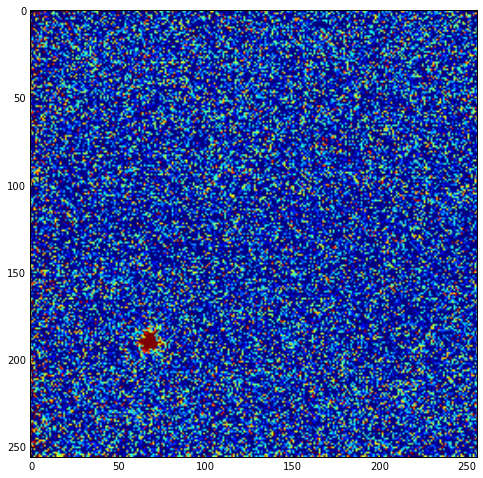

In [114]:
plt.imshow(image, vmin = 0, vmax = 10)

In [99]:
c = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))
d = c.to_pixel(WCS(header))
c, d

(<SkyCoord (ICRS): (ra, dec) in deg
     ( 270.62808754,  58.62726595)>,
 (array(67.77698606426343), array(190.06490818193765)))

In [101]:
fnames

array([ '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0000_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0001_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0002_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0003_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0004_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0005_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0006_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0007_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_0008_0000_6_bcd.fits',
       '/data1/phot_cal/spitzer/hd165459/r11638016/ch1/bcd/SPITZER_I1_11638016_00

In [102]:
fnames[4][71:75]

'0004'

In [117]:
sky = SkyCoord('18 02 30.7410086899 +58 37 38.157415821', unit=(u.hourangle, u.deg))

for fname in fnames:
    hdu    = fits.open(fname)
    header = hdu[0].header
    hdu.close()
    
    w = WCS(header)
    pix = sky.to_pixel(w)
    
    plot = plt.imshow(image, origin = 'lower', vmin = 0, vmax = 4)
    
    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
        flux, ap = func.photometry(image, [pix[0]], [pix[1]], rad = 3)
        ap.plot(color='y',linewidth=1)
    
        outfile = '../CalStar_ap_test/hd165459/folder1/hd_fol1_' + fname[71:75] + '.pdf'
        plt.title(fname[71:75])
        plt.colorbar(plot)
        plt.savefig(outfile)
#         pdb.set_trace()
        plt.clf()
    else:
        plt.clf()

plt.close()

In [105]:
data = Table(names = ('File#', 'ExpTime', 'Time[MJD]', 'Flux'), dtype= ('S5', 'f8', 'f8', 'f8'))
for fn in fnames:
    hdu    = fits.open(fn)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    pix = sky.to_pixel(w)
    
    ExpT = header['EXPTIME']
    fnum = fn[71:75]
    time = header['MJD_OBS']

    if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
        flux = func.photometry(image, [pix[0]], [pix[1]], rad = 5)[0]
    data.add_row([fnum, ExpT, time, flux])
data

<Table length=10>
File# ExpTime   Time[MJD]        Flux    
 str5 float64    float64       float64   
----- ------- ------------- -------------
 0000     0.2 53204.9589689 17275.0681854
 0001     0.2 53204.9592097 17275.0681854
 0002     0.2 53204.9594597 17714.6453433
 0003     0.2 53204.9596819 17714.6453433
 0004     0.2 53204.9598902 17686.0275512
 0005     0.2 53204.9601125 17686.0275512
 0006     0.2 53204.9603579 17864.3573482
 0007     0.2   53204.96058 17864.3573482
 0008     0.2 53204.9608393 17695.5268209
 0009     0.2 53204.9610569 17695.5268209

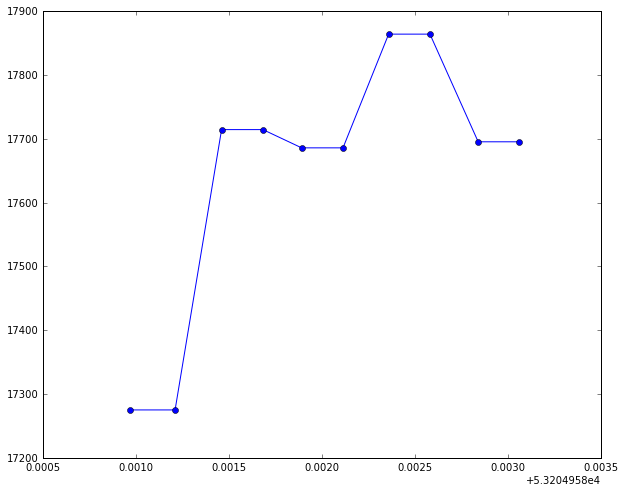

In [106]:
plt.plot(data['Time[MJD]'], data['Flux'], 'o-')